# Simple linear regression from scratch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file = pd.read_csv('../datasets/avocado.csv')[:800]
file.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
data = pd.DataFrame({'volume':file['Total Volume'], 'price':file['AveragePrice']})
data.head()

,volume,price
0,64236.62,1.33
1,54876.98,1.35
2,118220.22,0.93
3,78992.15,1.08
4,51039.60,1.28


In [13]:
# Changing the scale to avoid overflow
X, Y = np.array(data['volume']).reshape(-1, 1), data['price']
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [5]:
m, b = 0, 0

## Sum of squars
$$ Error =  \sum_{i=1}^{n} {(m*x+b) - y} $$
OR
$$ Error =  \sum_{i=1}^{n} {\hat{y} - y} $$

In [6]:
def error(X, Y, m, b):
    error = 0
    for x, y in zip(X, Y):
        x, y = float(x), float(y)
        error += (m*x+b - y)**2
    return error/len(X)

## We are using gradient descent
## Gradient
$$ \frac{\partial Error}{\partial m} = \frac{1}{n}2x(m*x+b - y) $$
OR
$$ \frac{\partial Error}{\partial m} = \frac{1}{n}2x( \hat{y} - y) $$
### AND
$$ \frac{\partial Error}{\partial b} = \frac{1}{n}2(m*x+b - y) $$
OR
$$ \frac{\partial Error}{\partial b} = \frac{1}{n}2( \hat{y} - y) $$

In [7]:
def gradient(X, Y, m, b, lr, itr):
    for _ in range(itr):
        for x, y in zip(X, Y):
            x, y = float(x), float(y)
            grad_m = x*(m*x+b-y)
            grad_b = m*x+b-y
            m -= grad_m*2/len(X)*lr
            b -= grad_b*2/len(X)*lr
    return m, b

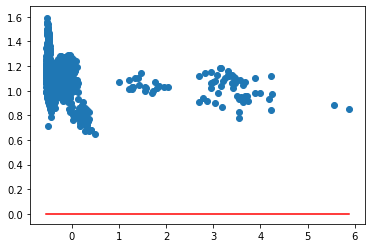

In [8]:
plt.scatter(X, Y)
plt.plot([min(X), max(X)], [(m*min(X)+b), (m*max(X)+b)], color='red')

In [9]:
error(X, Y, m, b)

1.1976801249999967

In [10]:
new_m, new_b = gradient(X, Y, m, b, 0.01, 10000)

In [11]:
error(X, Y, new_m, new_b)

0.022964062613667017

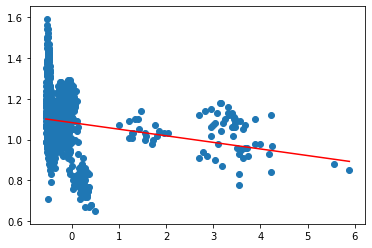

In [12]:
plt.scatter(X, Y)
plt.plot([min(X), max(X)], [(new_m*min(X)+new_b), (new_m*max(X)+new_b)], color='red')